# 1 Loading The Bank Data To Generate DataFrame

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import os

In [2]:
df = pd.read_csv("bank-marketing.csv")
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 19)

In [4]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
# so in feature matrix we can assume 
# 1. 7 integer(numeric) type attributes
# 2. 10 Categorical attributes
# Target vector would be "response"

In [7]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Quick Insights From Descriptive Summary:

Age :
    1. Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)
    2. Age has mean and median almost equal to 40, it shows that the aga data is normally distributed

Balance :
    1. Averege bank balance is 1,362
    2. Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed  
       across the dataset.
    3. Mean & Median value of the balance attribute has lot of difference which means you will find high level of data skewness 
       and outlier in its distribution

### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [8]:
print(df["pdays"].mean())
print(df["pdays"].median())
print(df["pdays"].mode()[0])

40.19782796222158
-1.0
-1


# Treatment of Missing data

As we can see from the above descriptive stats there seems to be no missing values But there are values like “unknown”, “others”, which are not adding any significance. It's just like missing values. Thus, these ambiguous values are removed from the dataset.

In [9]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [11]:
for i in df.columns:
    if i=="job" or i=="marital" or i=="education" or i=="contact" or i=="poutcome":
        print(df[i].unique())
        
    

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['unknown' 'failure' 'other' 'success']


As we can see from the above descriptive stats there seems to be no missing values But there are values like “unknown”, “others”, which are not adding any significance. It's just like missing values. Thus, these ambiguous values are removed from the dataset

In [12]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [13]:
del_condition = df.poutcome == 'others'
df1 = df.drop(df[del_condition].index, axis = 0, inplace = False)
print("New dataframe  is :",df1['poutcome'].value_counts())


New dataframe  is : unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


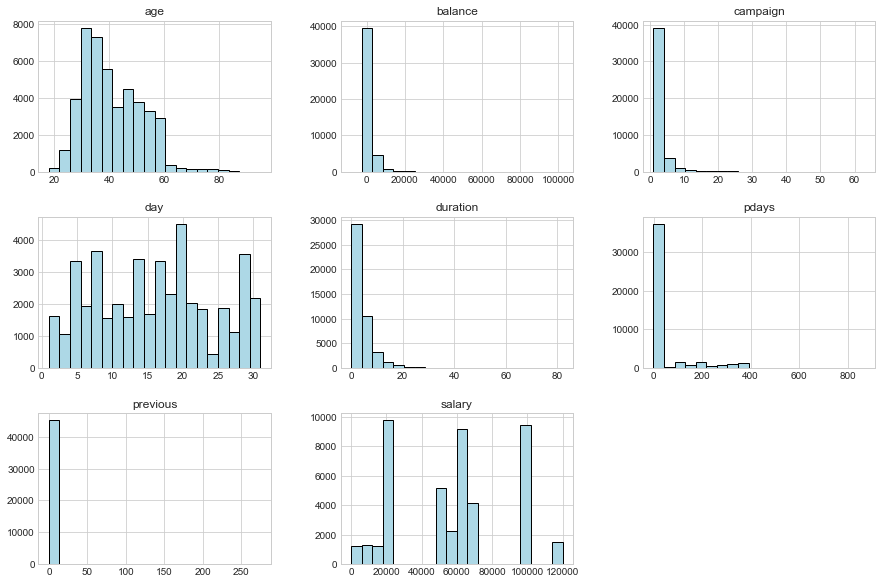

In [14]:
#Change the unit of 'duration' from seconds to minutes

newdf = df.copy()

newdf['duration'] = newdf['duration'].apply(lambda n:n/60).round(2)

plt.style.use('seaborn-whitegrid')

newdf.hist(bins=20, figsize=(15,10), color='lightblue', edgecolor = 'black')
plt.show()




In [15]:

print("Descriptive stats of duration",newdf['duration'].describe())
print("Descriptive stats of campaign",newdf['campaign'].describe())
print("Descriptive stats of day", newdf['day'].describe())
print("Descriptive stats of no of day past the capaign was last done: ", newdf['pdays'].describe())

Descriptive stats of duration count    45211.000000
mean         4.302729
std          4.292132
min          0.000000
25%          1.720000
50%          3.000000
75%          5.320000
max         81.970000
Name: duration, dtype: float64
Descriptive stats of campaign count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64
Descriptive stats of day count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64
Descriptive stats of no of day past the capaign was last done:  count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


# Checking Outliers

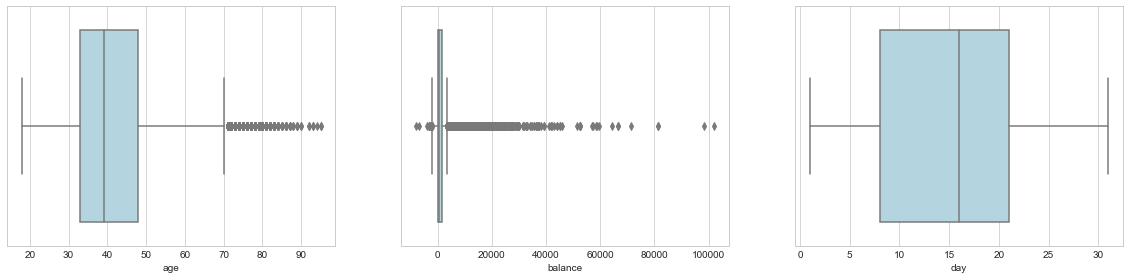

In [16]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf.age, color='lightblue')

plt.subplot(3,3,2)
sns.boxplot(x= newdf.balance, color='lightblue')

plt.subplot(3,3,3)
sns.boxplot(x= newdf.day, color='lightblue')


plt.show()

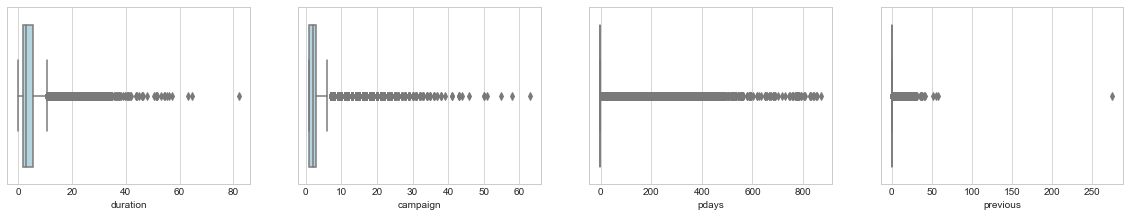

In [17]:
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(x= newdf.duration, color='lightblue')

plt.subplot(4,4,2)
sns.boxplot(x= newdf.campaign, color='lightblue')

plt.subplot(4,4,3)
sns.boxplot(x= newdf.pdays, color='lightblue')

plt.subplot(4,4,4)
sns.boxplot(x= newdf.previous, color='lightblue')

plt.show()

# Treatment of outliers

In [18]:
from scipy.stats import zscore
import scipy.stats as stats

#Let's check Skew in all numercial attributes


Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.age),stats.skew(df.day),stats.skew(df.balance),stats.skew(df.duration),stats.skew(df.campaign),stats.skew(df.pdays),stats.skew(df.previous) ]},
                        index=['age','day','balance', 'duration', 'campaign', 'pdays', 'previous'])  # Measure the skeweness of the required columns
Skewness 

,Skewness
age,0.684795
day,0.093076
balance,8.360031
duration,3.144214
campaign,4.898488
pdays,2.615629
previous,41.845066


We managed to get rid to some extreme outlier shown below. 


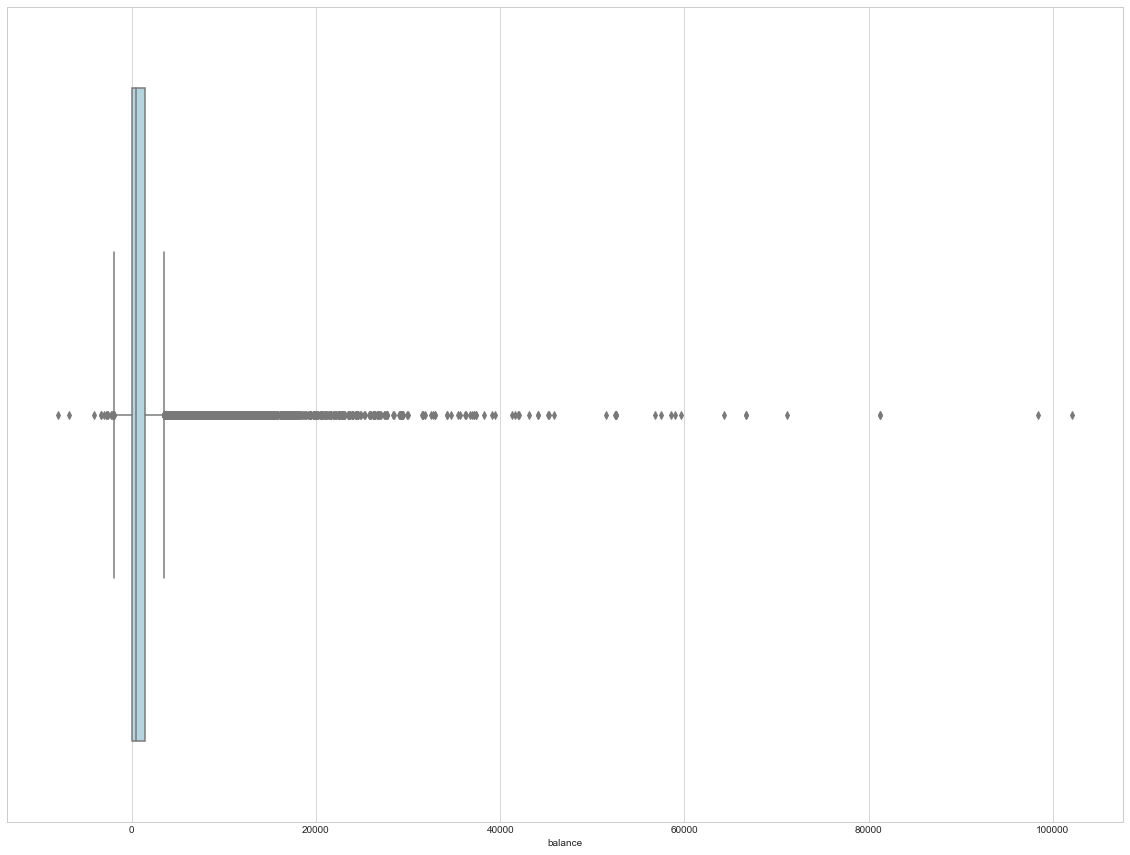

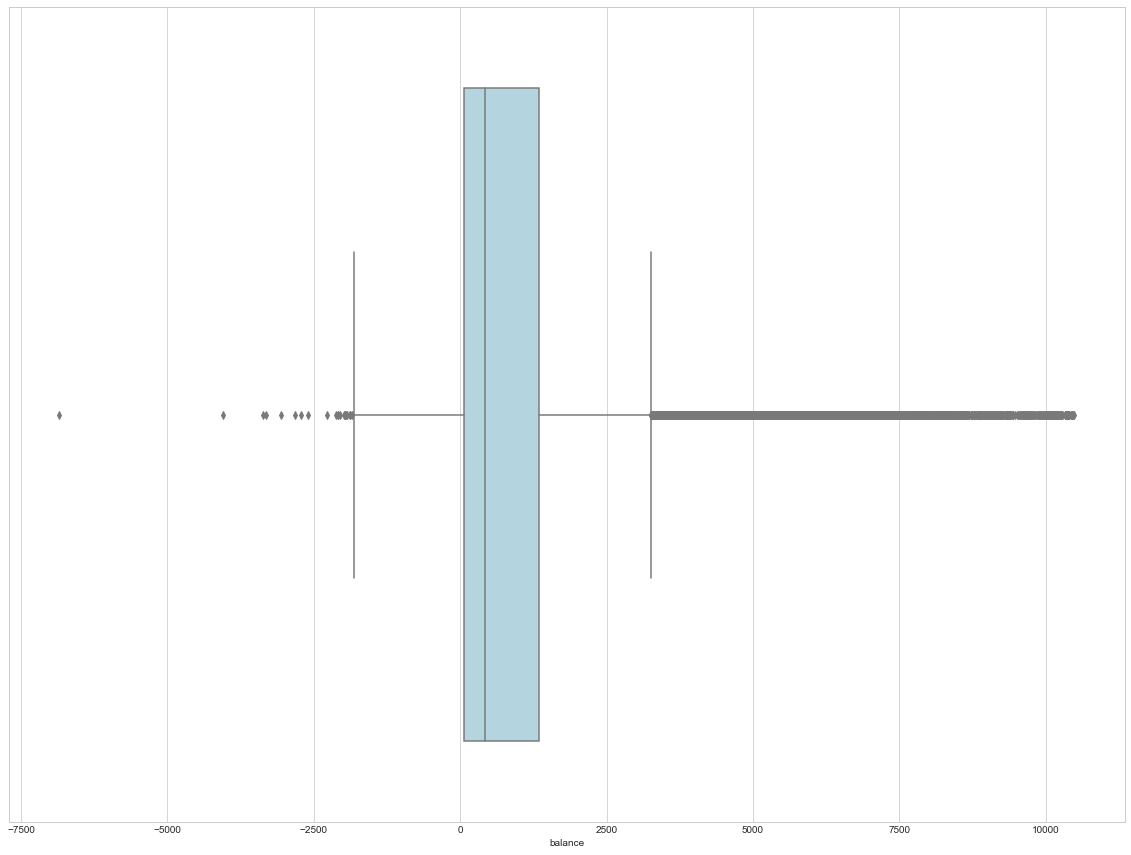

In [19]:
#Removing outliers in balance data using zscore:

from scipy.stats import zscore

newdf[['balance']].mean()
newdf[['balance']].mean()

newdf['balance_outliers'] = newdf['balance']
newdf['balance_outliers']= zscore(newdf['balance_outliers'])

condition1 = (newdf['balance_outliers']>3) | (newdf['balance_outliers']<-3 )
newdf1 = newdf.drop(newdf[condition1].index, axis = 0, inplace = False)
newdf2 = newdf1.drop('balance_outliers', axis=1)

#original one 
plt.figure(figsize= (20,15))
sns.boxplot(x= newdf.balance, color='lightblue')

#After outlier treatment using z score

plt.figure(figsize= (20,15))
sns.boxplot(x= newdf2.balance, color='lightblue')
print("We managed to get rid to some extreme outlier shown below. ")

In [20]:
objdf = newdf.select_dtypes(include ='object') 
objdf.head(5)

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
0,management,married,tertiary,yes,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,yes,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,yes,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,no,unknown,may,unknown,no


job count distribution :  blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


Text(0.5, 1.0, 'Job Type Distribution')

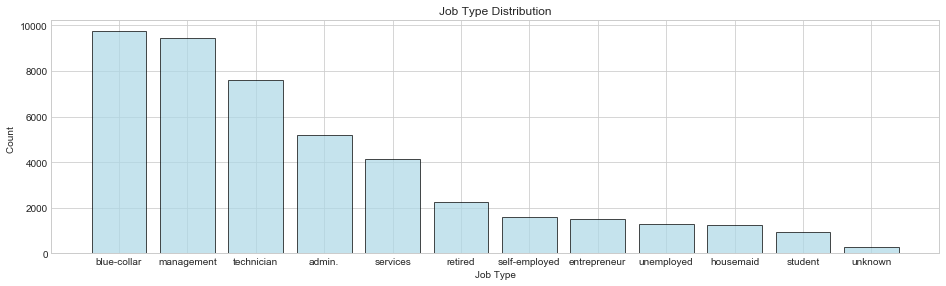

In [21]:
plt.figure(figsize=(35,30))

#Job category

x = newdf.job.value_counts().index    #Values for x-axis
print("job count distribution : ", newdf.job.value_counts())
y = [newdf['job'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(6,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Job Type')
plt.ylabel('Count ')
plt.title('Job Type Distribution')


x1 marital attribute count:  married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


Text(0.5, 1.0, 'Marital Status distribution')

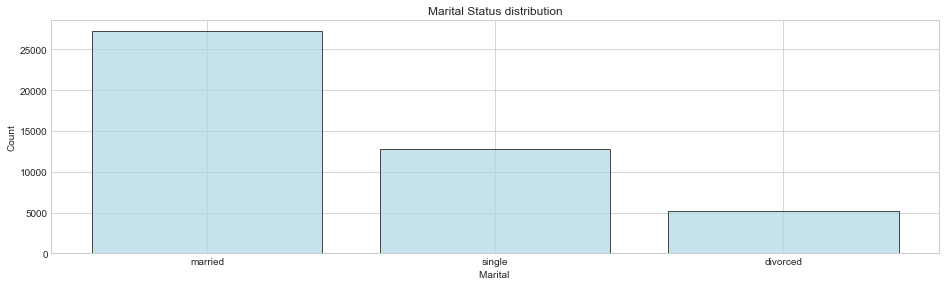

In [22]:
#Marital Status 
plt.figure(figsize=(35,30))
x1 = newdf.marital.value_counts().index    #Values for x-axis
y1 = [newdf['marital'].value_counts()[j] for j in x1]   # Count of each class on y-axis

print("\nx1 marital attribute count: ", newdf.marital.value_counts())
plt.subplot(6,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Marital ')
plt.ylabel('Count')
plt.title('Marital Status distribution')





x2 education level count distribution:  secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


Text(0.5, 1.0, "education' distribution")

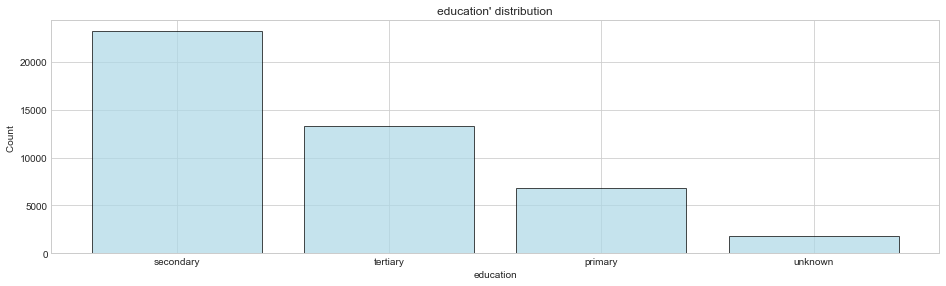

In [23]:
#education level
plt.figure(figsize=(35,30))
x2 = newdf.education.value_counts().index    #Values for x-axis
y2 = [newdf['education'].value_counts()[k] for k in x2]   # Count of each class on y-axis

print("\nx2 education level count distribution: ", newdf.education.value_counts())

plt.subplot(6,2,3)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('education')
plt.ylabel('Count ')
plt.title("education' distribution")



x3 Credit default count distribution:  no     44396
yes      815
Name: default, dtype: int64


Text(0.5, 1.0, 'Credit Default Distribution')

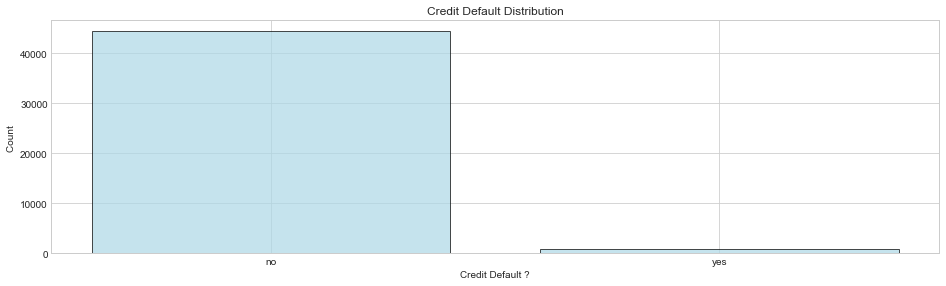

In [24]:

#credit defaulter or not?
plt.figure(figsize=(35,30))

x3 = newdf.default.value_counts().index    #Values for x-axis
y3 = [newdf['default'].value_counts()[l] for l in x3]   # Count of each class on y-axis

print("\nx3 Credit default count distribution: ", newdf.default.value_counts())
plt.subplot(6,2,4)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Credit Default ?')
plt.ylabel('Count ')
plt.title("Credit Default Distribution")




x4 housing loan count distribution:  yes    25130
no     20081
Name: housing, dtype: int64


Text(0.5, 1.0, 'Housing Loan Distribution')

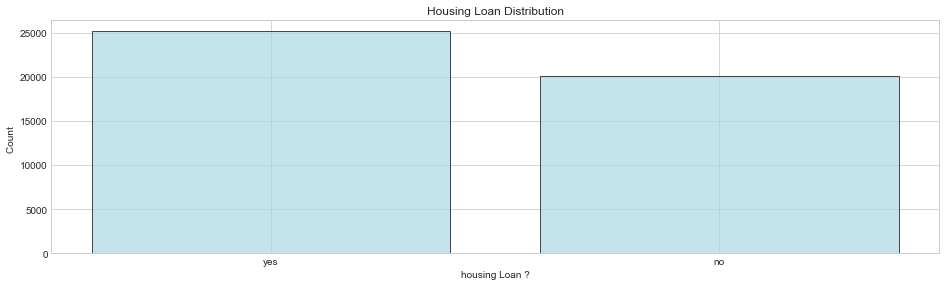

In [25]:
#housing loan availed or not 
plt.figure(figsize=(35,30))

x4 = newdf.housing.value_counts().index    #Values for x-axis
y4 = [newdf['housing'].value_counts()[m] for m in x4]   # Count of each class on y-axis

print("\nx4 housing loan count distribution: ", newdf.housing.value_counts())
plt.subplot(6,2,5)
plt.bar(x4,y4, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('housing Loan ?')
plt.ylabel('Count ')
plt.title("Housing Loan Distribution")


Personal loan count distribution:  no     37967
yes     7244
Name: loan, dtype: int64


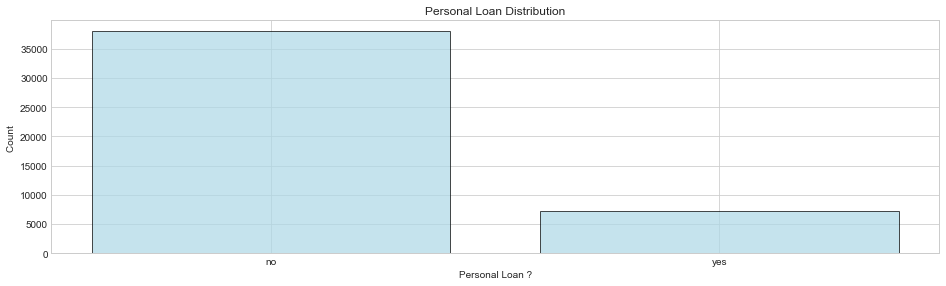

In [26]:
#Personal Loan
plt.figure(figsize=(35,30))
x5 = newdf.loan.value_counts().index    #Values for x-axis
y5 = [newdf['loan'].value_counts()[n] for n in x5]   # Count of each class on y-axis
print("\nPersonal loan count distribution: ", newdf.loan.value_counts())
plt.subplot(6,2,6)
plt.bar(x5,y5, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Personal Loan ?')
plt.ylabel('Count ')
plt.title("Personal Loan Distribution")
plt.show()


Distribution Of Mode Of Communication With Customers:  cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Distribution Of communication result:  unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Distribution Of monthly customer contact detail :  may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


Text(0.5, 1.0, 'Month Contacted Distribution')

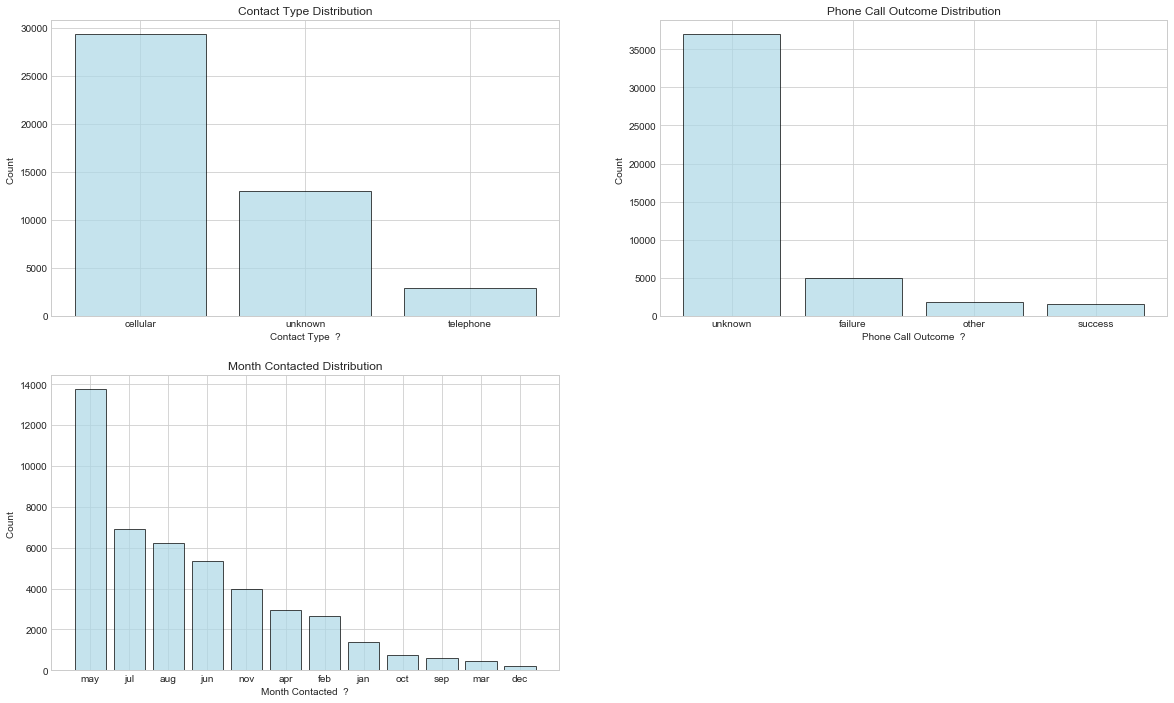

In [27]:
plt.figure(figsize=(20,25))

#Mode of communication with customers
x6 = newdf.contact.value_counts().index    #Values for x-axis
y6 = [newdf['contact'].value_counts()[o] for o in x6]   # Count of each class on y-axis

print("\nDistribution Of Mode Of Communication With Customers: ", newdf.contact.value_counts())

plt.subplot(4,2,1)
plt.bar(x6,y6, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Contact Type  ?')
plt.ylabel('Count ')
plt.title("Contact Type Distribution")

#communication result

x7 = newdf.poutcome.value_counts().index    #Values for x-axis
y7 = [newdf['poutcome'].value_counts()[p] for p in x7]   # Count of each class on y-axis

print("\nDistribution Of communication result: ", newdf.poutcome.value_counts())

plt.subplot(4,2,2)
plt.bar(x7,y7, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Phone Call Outcome  ?')
plt.ylabel('Count ')
plt.title("Phone Call Outcome Distribution")

#month when customer was last contacted

x8 = newdf.month.value_counts().index    #Values for x-axis
y8 = [newdf['month'].value_counts()[q] for q in x8]   # Count of each class on y-axis

print("\nDistribution Of monthly customer contact detail : ", newdf.month.value_counts())
plt.subplot(4,2,3)
plt.bar(x8,y8, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Month Contacted  ?')
plt.ylabel('Count ')
plt.title("Month Contacted Distribution")


Distribution Of customer W.R.T FD :  no     39922
yes     5289
Name: response, dtype: int64


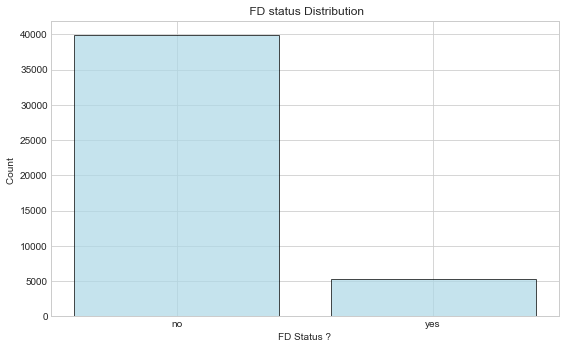

In [28]:
#FD status Which is our target variable
plt.figure(figsize=(20,25))
x9 = newdf.response.value_counts().index    #Values for x-axis
y9 = [newdf['response'].value_counts()[r] for r in x9]   # Count of each class on y-axis

print("\nDistribution Of customer W.R.T FD : ", newdf.response.value_counts())
plt.subplot(4,2,4)
plt.bar(x9,y9, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('FD Status ?')
plt.ylabel('Count ')
plt.title(" FD status Distribution")

plt.show()

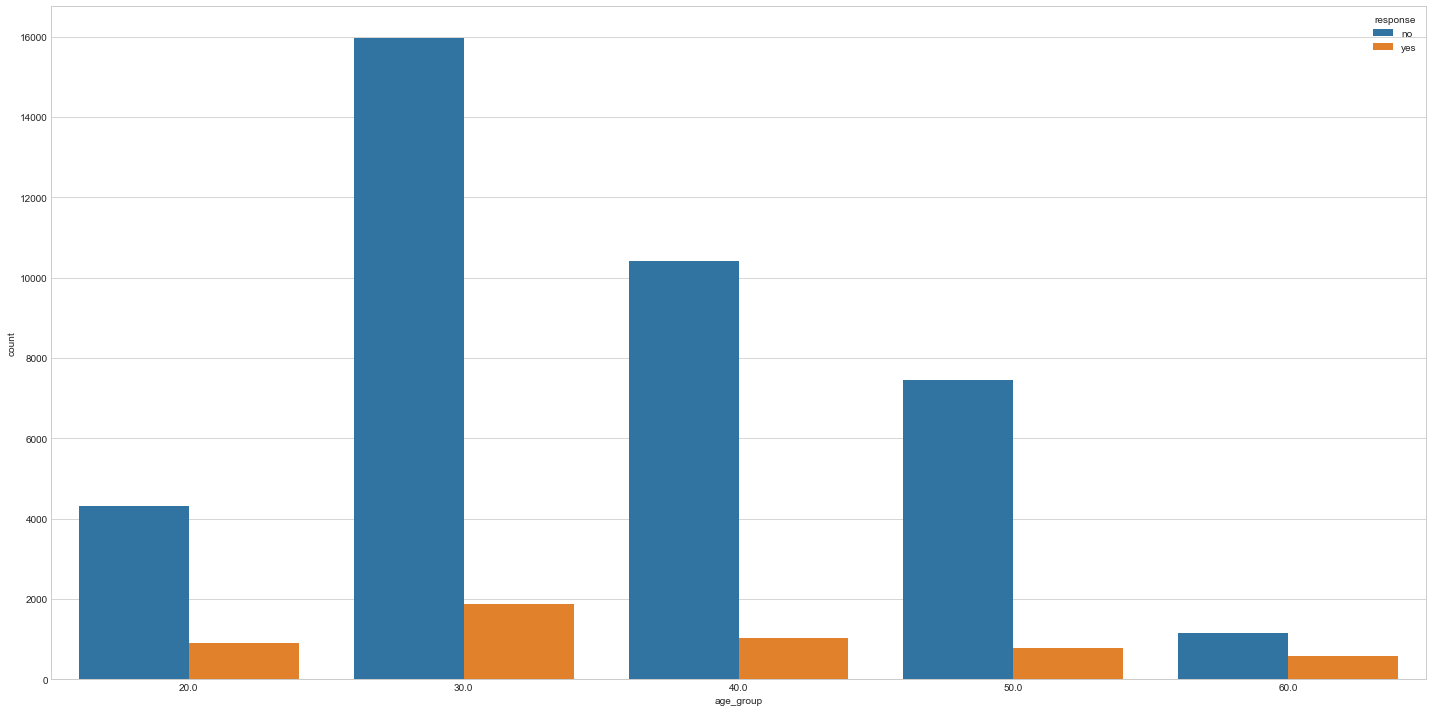

In [29]:
# 1. FD Subscribers Age Distribution: 

#But First Let's Craete Age Grouping: 

lst = [newdf2]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
    count_age_response_pct = pd.crosstab(newdf2['response'],newdf2['age_group']).apply(lambda x: x/x.sum() * 100)
    
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(newdf2['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% FD Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)


plt.figure(figsize=(20,10))
sns.countplot(newdf2['age_group'], hue = "response", data=newdf2)
plt.tight_layout()

# Number of customers who subscribed to FD based on their job profile

In [30]:
newdf2.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,age_group
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,4.35,1,-1,0,unknown,no,50.0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,2.52,1,-1,0,unknown,no,40.0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,1.27,1,-1,0,unknown,no,30.0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,1.53,1,-1,0,unknown,no,40.0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,3.30,1,-1,0,unknown,no,30.0


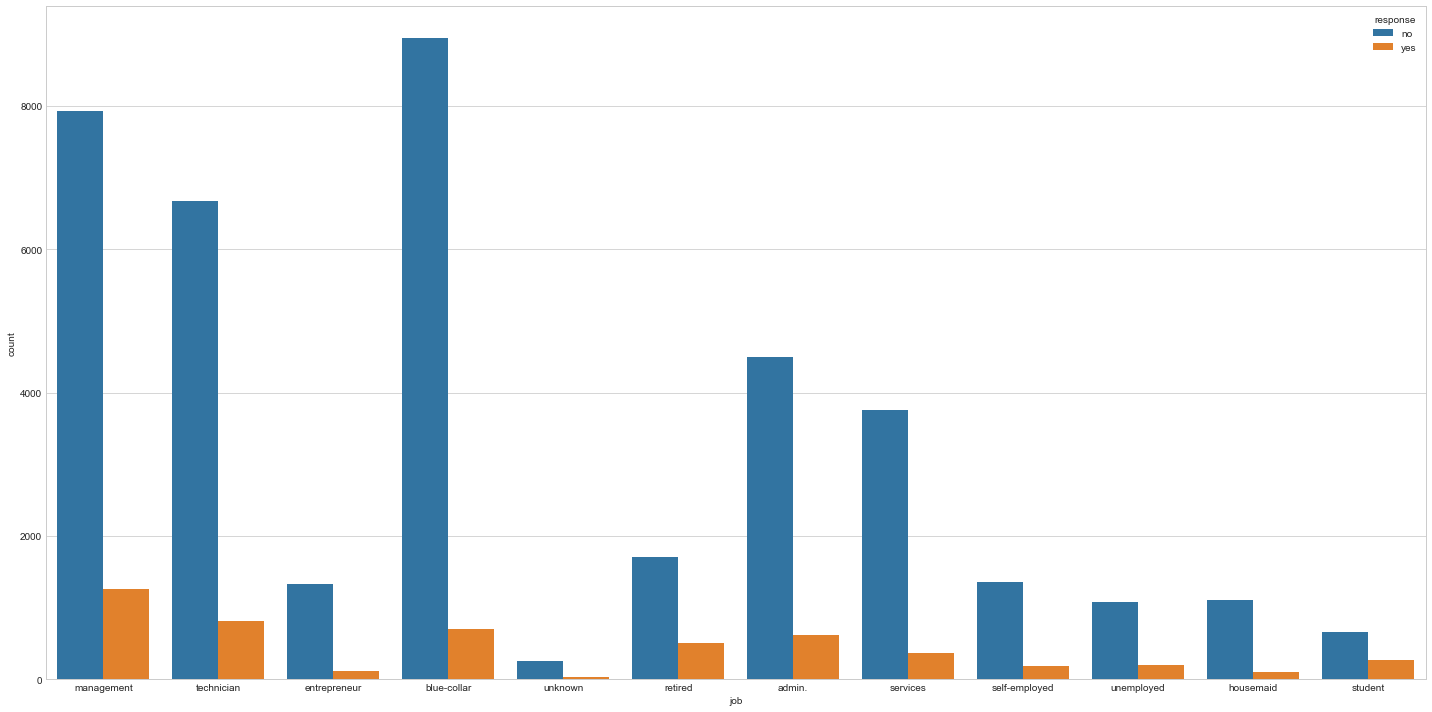

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(newdf2.job, hue = "response", data=newdf2)
plt.tight_layout()

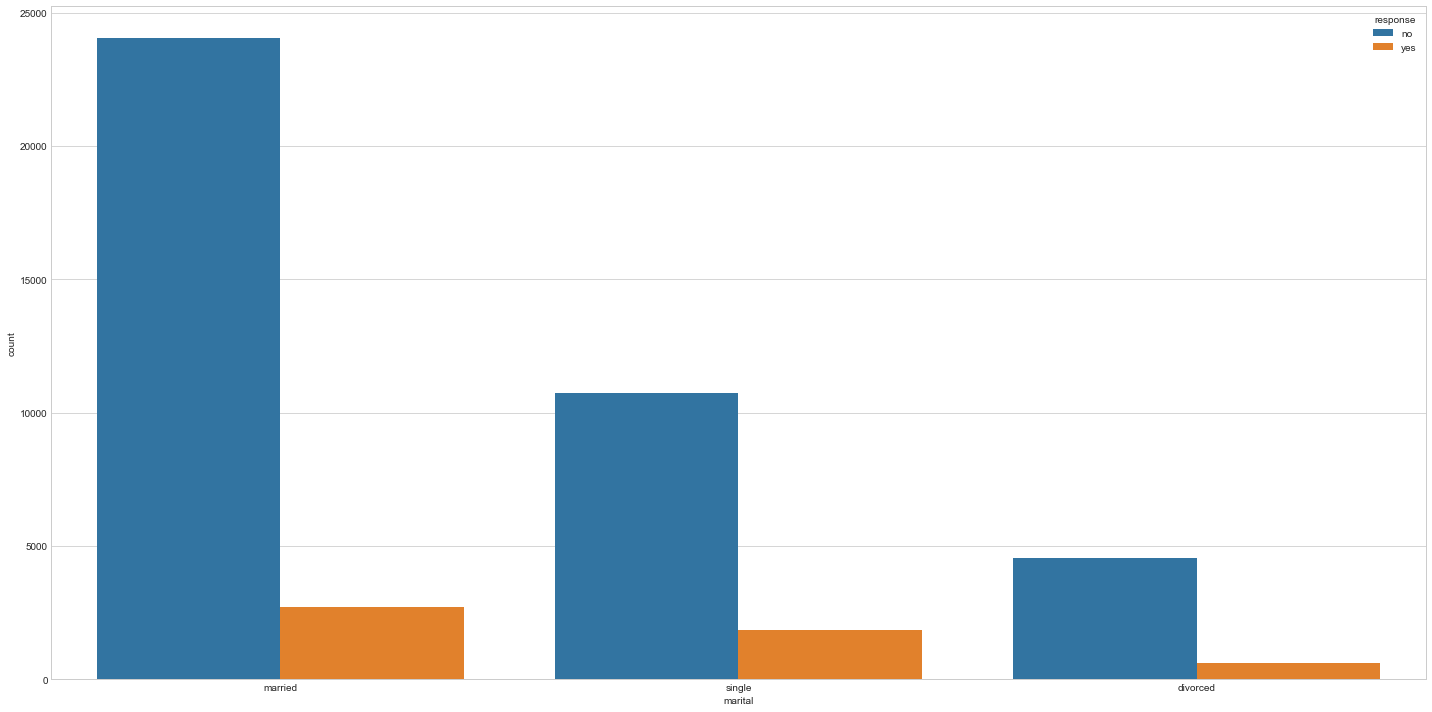

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(newdf2.marital, hue = "response", data=newdf2)
plt.tight_layout()

## Number of customers who subscribed to FD based on their education level

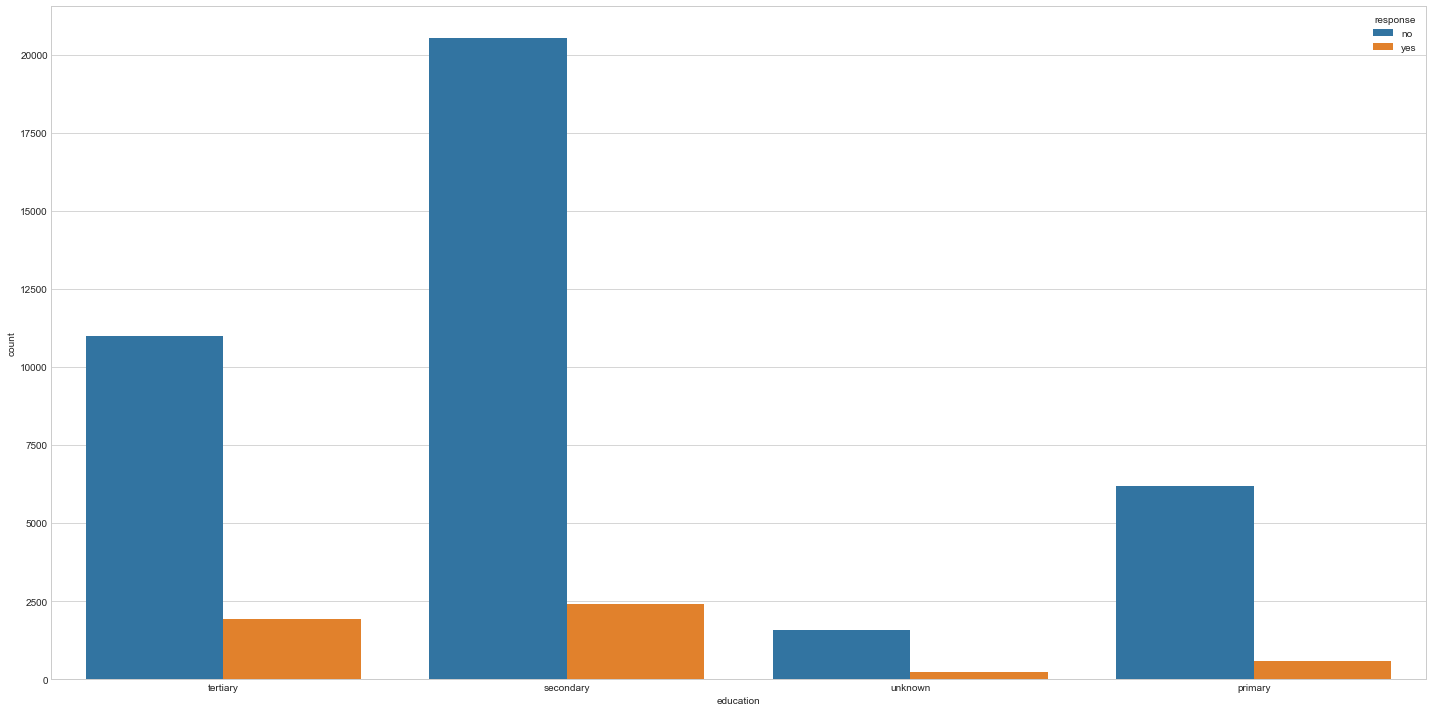

In [33]:

plt.figure(figsize=(20,10))
sns.countplot(newdf2.education, hue = "response", data=newdf2)
plt.tight_layout()

## Number of customers who subscribed to FD based on their Personal Loan Status


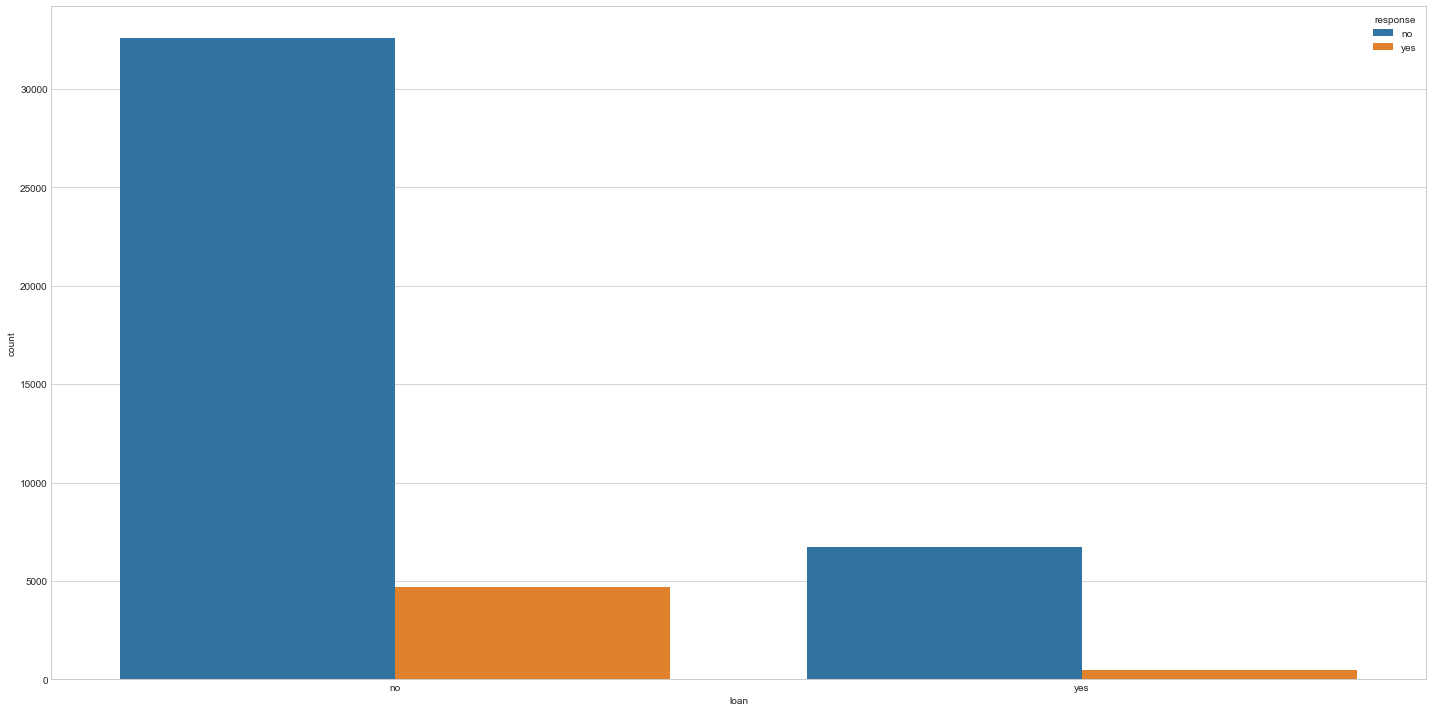

In [34]:

plt.figure(figsize=(20,10))
sns.countplot(newdf2.loan, hue = "response", data=newdf2)
plt.tight_layout()

## Number of customers who subscribed to FD based on their Housing Loan Status


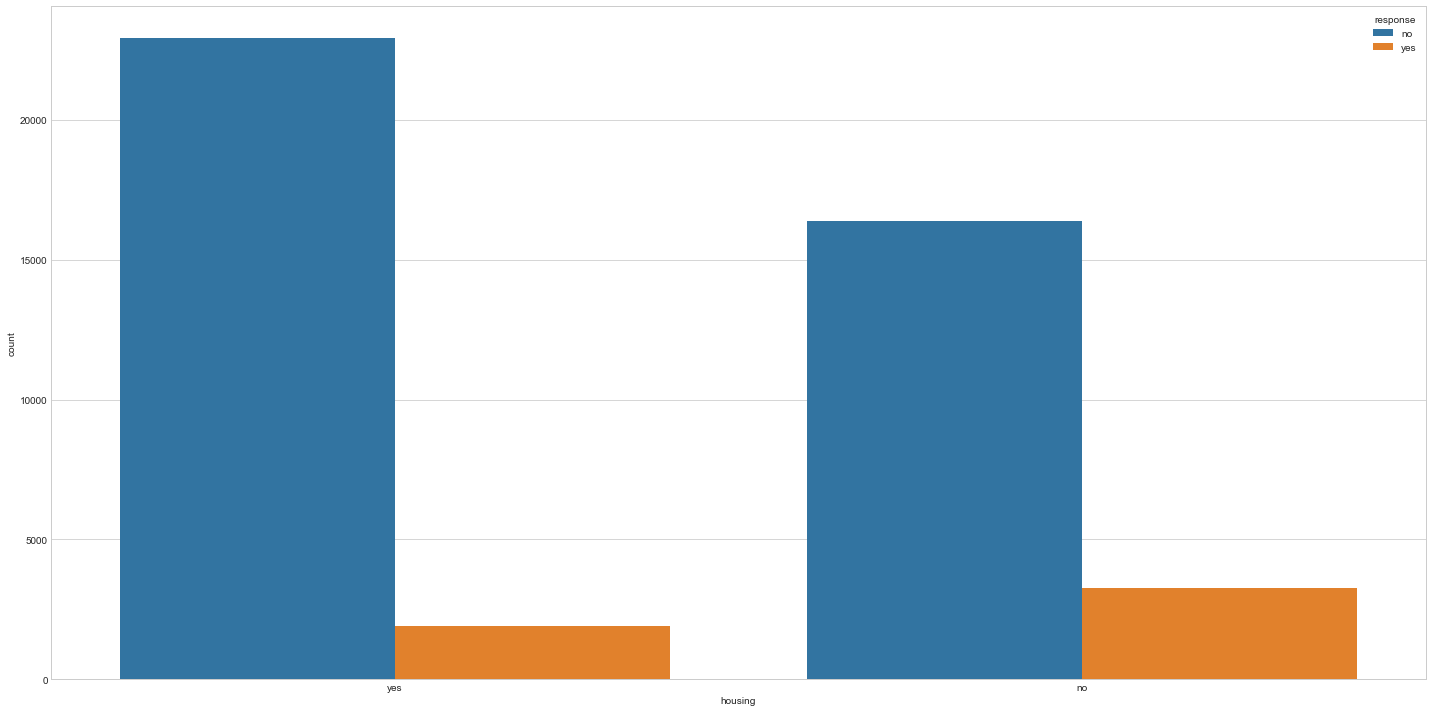

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(newdf2.housing, hue = "response", data=newdf2)
plt.tight_layout()

## Number of customers who subscribed to FD based on their Credit Default  Status

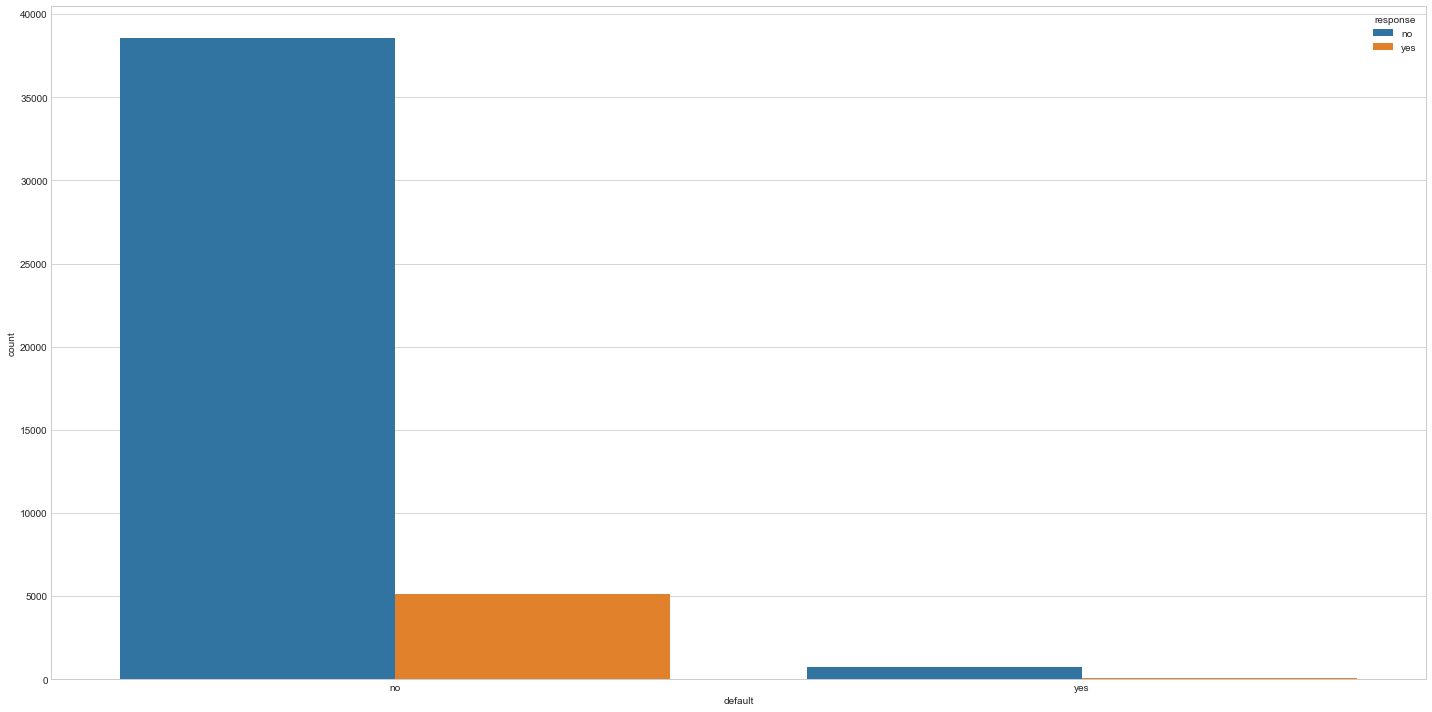

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(newdf2.default, hue = "response", data=newdf2)
plt.tight_layout()

## 2. Duration &  Campaign:

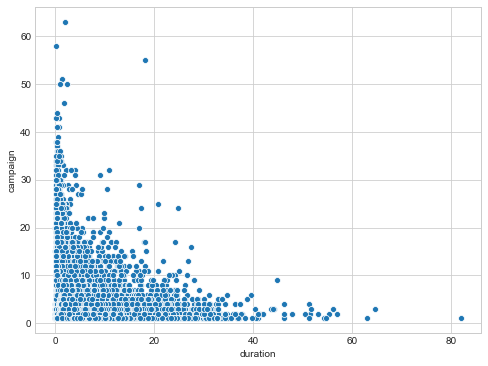

In [37]:
 
plt.figure(figsize=(8,6))
sns.scatterplot(newdf2.duration, newdf2.campaign, palette= ['pink','lightblue'] )
plt.show()

## FD subscription rate by job

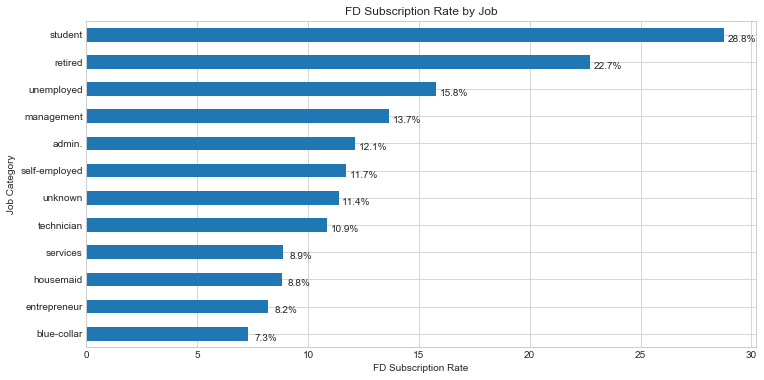

In [38]:
#First Let's Transform The Data, So that we can plot them meaningfully

count_job_target_pct = pd.crosstab(newdf2['response'],newdf2['job']).apply(lambda x: x/x.sum() * 100)
count_job_target_pct = count_job_target_pct.transpose()

plot_job = count_job_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Job')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches, count_job_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

## FD Subscription Rate Based on Marital Status

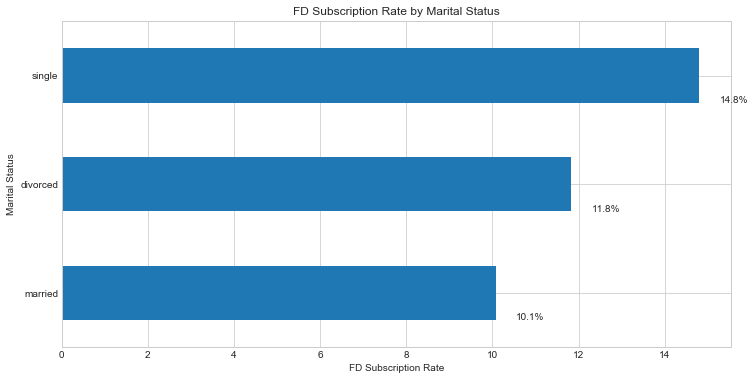

In [39]:
count_marital_target_pct = pd.crosstab(newdf2['response'],newdf2['marital']).apply(lambda x: x/x.sum() * 100)
count_marital_target_pct = count_marital_target_pct.transpose()

plot_marital = count_marital_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Marital Status')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Marital Status')

# Label each bar
for rec, label in zip(plot_marital.patches, count_marital_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_marital.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

## FD Subscription Rate Based on Education Level:

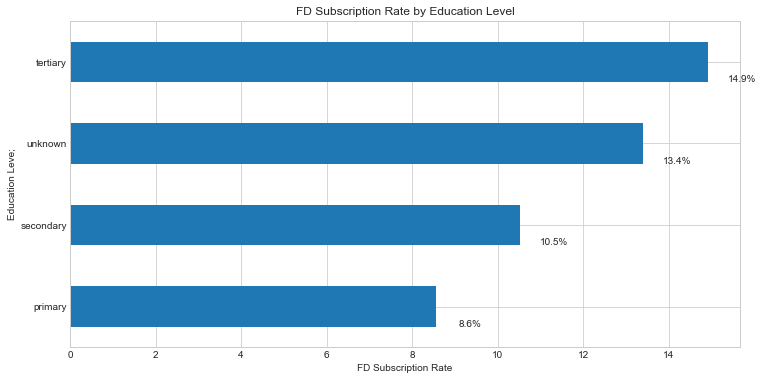

In [40]:
count_education_target_pct = pd.crosstab(newdf2['response'],newdf2['education']).apply(lambda x: x/x.sum() * 100)
count_education_target_pct= count_education_target_pct.transpose()

plot_education = count_education_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Education Level')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Education Leve;')

# Label each bar
for rec, label in zip(plot_education.patches, count_education_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


## Impact Of Call Duration On FD Conversion:


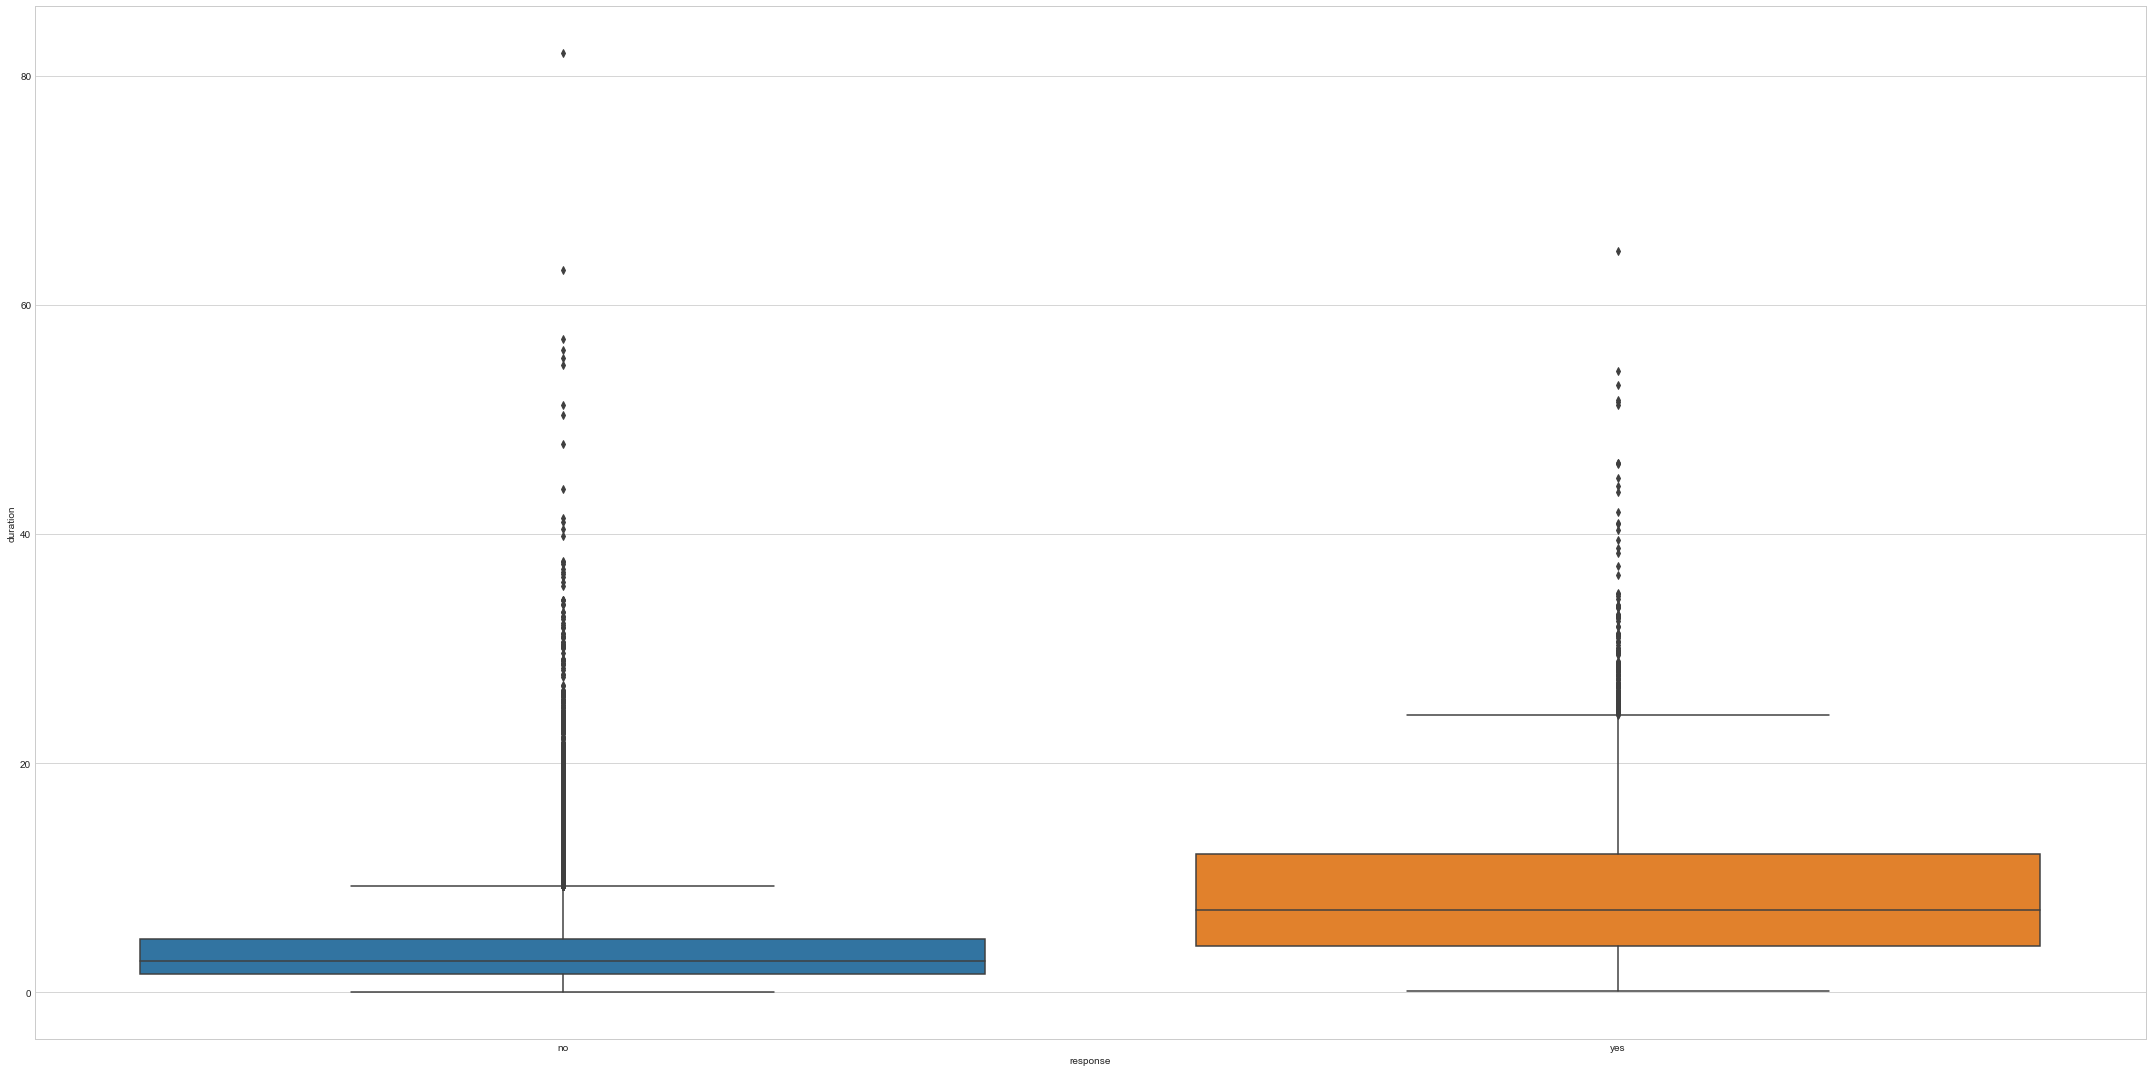

In [41]:
plt.figure(figsize=(30,15))
ax = sns.boxplot(newdf2['response'], newdf2['duration'], data=df)

plt.tight_layout()

## How each numerical attributes are correlated each other

In [42]:
#CORRELATION MATRIX FOR ALL THE NUMERICAL ATTRIBUTES: 

newdf2.corr()

# Let's Change 'month' from words to numbers for easier analysis
lst = [newdf2]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12
    
    


def convert(newdf2, new_column, old_column):
    newdf2[new_column] = newdf2[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return newdf2[new_column].value_counts()

Correlation Matrix
                age   balance       day  duration  campaign     pdays  \
age        1.000000  0.104874 -0.008593 -0.004314  0.005596 -0.023656   
balance    0.104874  1.000000  0.010418  0.036490 -0.023321  0.013070   
day       -0.008593  0.010418  1.000000 -0.030393  0.163769 -0.094159   
duration  -0.004314  0.036490 -0.030393  1.000000 -0.085073 -0.002235   
campaign   0.005596 -0.023321  0.163769 -0.085073  1.000000 -0.089006   
pdays     -0.023656  0.013070 -0.094159 -0.002235 -0.089006  1.000000   
month_int  0.091721  0.101052  0.100190 -0.011132  0.057093 -0.109412   
previous   0.001154  0.029837 -0.052084  0.001236 -0.032407  0.453749   

           month_int  previous  
age         0.091721  0.001154  
balance     0.101052  0.029837  
day         0.100190 -0.052084  
duration   -0.011132  0.001236  
campaign    0.057093 -0.032407  
pdays      -0.109412  0.453749  
month_int   1.000000 -0.035696  
previous   -0.035696  1.000000  


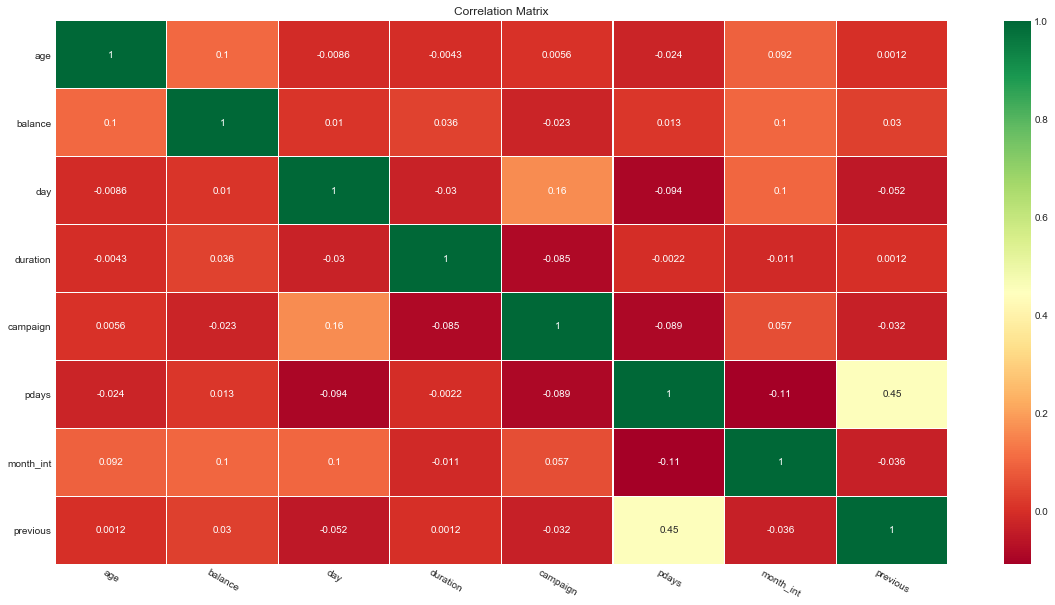

In [43]:
corr_data = newdf2[['age','balance','day','duration','campaign','pdays','month_int', 'previous','response']]
corr = corr_data.corr()
print("Correlation Matrix")
print(corr)

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Quick Insights On Correlation Matrix:

-  Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”, “month of contact” and “number of campaign”. 
- We will further understand their influences on campaign outcome while building ML models.

# Cleaning Up Data & Preparing Data For Model Building


## 1. Removing Any Missing Or Meaningless Values


In [44]:
newdf2.describe()

,age,salary,balance,day,duration,campaign,pdays,previous,age_group,month_int
count,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000,44466.000000
mean,40.882382,56837.156479,1084.544483,15.803558,4.300972,2.765506,40.244614,0.579544,36.264112,6.128345
std,10.596139,32034.589934,1721.069271,8.328517,4.290663,3.100462,100.268044,2.310143,10.347819,2.397347
min,18.000000,0.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,20.000000,1.000000
25%,33.000000,20000.000000,68.000000,8.000000,1.720000,1.000000,-1.000000,0.000000,30.000000,5.000000
50%,39.000000,60000.000000,431.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,30.000000,6.000000
75%,48.000000,70000.000000,1347.000000,21.000000,5.320000,3.000000,-1.000000,0.000000,40.000000,8.000000
max,95.000000,120000.000000,10483.000000,31.000000,81.970000,63.000000,871.000000,275.000000,60.000000,12.000000


In [45]:
newdf2.head(5)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,age_group,month_int
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,...,5,may,4.35,1,-1,0,unknown,no,50.0,5.0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,...,5,may,2.52,1,-1,0,unknown,no,40.0,5.0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,...,5,may,1.27,1,-1,0,unknown,no,30.0,5.0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,...,5,may,1.53,1,-1,0,unknown,no,40.0,5.0
4,33,unknown,0,single,unknown,no,no,1,no,no,...,5,may,3.30,1,-1,0,unknown,no,30.0,5.0


There are attributes having values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

 - poutcome has many unknown values which doesn't makes any sense, so we can remove it. 
 - Let's identify and treat them below

In [46]:
condition = newdf2.poutcome == 'other'
newdf2.drop(newdf2[condition].index, axis = 0, inplace = True)
newdf2.describe()

,age,salary,balance,day,duration,campaign,pdays,previous,age_group,month_int
count,42659.000000,42659.000000,42659.000000,42659.000000,42659.000000,42659.000000,42659.000000,42659.000000,42659.000000,42659.000000
mean,40.936778,56863.381701,1080.688624,15.862491,4.302735,2.778054,32.207740,0.434844,36.321995,6.159732
std,10.577936,32049.063592,1719.946765,8.329704,4.297314,3.140477,90.852678,1.563521,10.337637,2.361071
min,18.000000,0.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,20.000000,1.000000
25%,33.000000,20000.000000,66.000000,8.000000,1.720000,1.000000,-1.000000,0.000000,30.000000,5.000000
50%,39.000000,60000.000000,425.000000,16.000000,3.000000,2.000000,-1.000000,0.000000,30.000000,6.000000
75%,48.000000,70000.000000,1341.500000,21.000000,5.300000,3.000000,-1.000000,0.000000,40.000000,8.000000
max,95.000000,120000.000000,10483.000000,31.000000,81.970000,63.000000,871.000000,55.000000,60.000000,12.000000


As we removed other variable from poutcome attribure we can see that now the total record count has changed to 43371 from original 45211

In [47]:
for i in newdf2.select_dtypes(include='object').columns:
    print(i)
    print(newdf2[i].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
targeted
['yes' 'no']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'success']
response
['no' 'yes']


As you can see by the ouput of our unique method there are some values like unknown in job & education column. So we can replace them with more meaningful value called others to make some sense.

Let's treat these attributes below:

In [48]:
newdf2[['job','education']] = newdf2[['job','education']].replace(['unknown'],'other')

#Let's See our dataframe & verify if it has been updated
print("\n\nAfter Treatment", newdf2['education'].count)



After Treatment <bound method Series.count of 0         tertiary
1        secondary
2        secondary
3            other
4            other
           ...    
45205    secondary
45206     tertiary
45207      primary
45208    secondary
45209    secondary
Name: education, Length: 42659, dtype: object>


## Let's get rid of contact Column As It has no significant role to play in predicting outcome

In [49]:
newdf2['contact'].value_counts() 

cellular     27170
unknown      12822
telephone     2667
Name: contact, dtype: int64

In [50]:
# Drop column "contact" which seems to be not so useful

new_df1 = newdf2.copy()
newdf2.drop('contact', axis=1, inplace = True)
new_df2 = newdf2.copy()

In [51]:
# Let's get rid of  customer values with 'other' in education column as it doesn't make any sense to have such values in making any useful predcition .

logic = (new_df2['education'] == 'other')
new_df2.drop(new_df2[logic].index, axis = 0, inplace = True)
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 45209
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        40901 non-null  int64  
 1   job        40901 non-null  object 
 2   salary     40901 non-null  int64  
 3   marital    40901 non-null  object 
 4   education  40901 non-null  object 
 5   targeted   40901 non-null  object 
 6   default    40901 non-null  object 
 7   balance    40901 non-null  int64  
 8   housing    40901 non-null  object 
 9   loan       40901 non-null  object 
 10  day        40901 non-null  int64  
 11  month      40901 non-null  object 
 12  duration   40901 non-null  float64
 13  campaign   40901 non-null  int64  
 14  pdays      40901 non-null  int64  
 15  previous   40901 non-null  int64  
 16  poutcome   40901 non-null  object 
 17  response   40901 non-null  object 
 18  age_group  40901 non-null  float64
 19  month_int  40901 non-null  float64
dtypes: flo

# Pre-Processing Data¶
In this section we will deal with

##### *Transforming the required attribute which are categorical to numerical so that our mdoel can process
##### *Data imbalance
##### *Steps to treat data imbalance
##### *Selcting most relevant features for model building


# Transforming All Categorical Column to Numercial Values using encoding

In [52]:
newdf2.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,age_group,month_int
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,50.0,5.0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,40.0,5.0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,30.0,5.0
3,47,blue-collar,20000,married,other,no,no,1506,yes,no,5,may,1.53,1,-1,0,unknown,no,40.0,5.0
4,33,other,0,single,other,no,no,1,no,no,5,may,3.30,1,-1,0,unknown,no,30.0,5.0


In [53]:
# Function to replace marital values with numercial
def marital_num(df):
    mar= [df]
    for data in mar: 
        data.loc[data['marital'] == "married", "marital_int"] = 1
        data.loc[data['marital'] == "single", "marital_int"] = 2
        data.loc[data['marital'] == "divorced", "marital_int"] = 3
        
#Job

#JOB: 
def job_num(df):
    jb= [df]
    for data in jb: 
        data.loc[data['job'] == "management", "Job_int"] = 1
        data.loc[data['job'] == "technician", "Job_int"] = 2
        data.loc[data['job'] == "entrepreneur", "Job_int"] = 3
        data.loc[data['job'] == "blue-collar", "Job_int"] = 4
        data.loc[data['job'] == "retired", "Job_int"] = 5
        data.loc[data['job'] == "admin.", "Job_int"] = 6
        data.loc[data['job'] == "services", "Job_int"] = 7
        data.loc[data['job'] == "self-employed", "Job_int"] = 8
        data.loc[data['job'] == "unemployed", "Job_int"] = 9
        data.loc[data['job'] == "student", "Job_int"] = 10
        data.loc[data['job'] == "housemaid", "Job_int"] = 11
        data.loc[data['job'] == "other", "Job_int"] = 12
        
#Education:

def edu_num(df):
    edu= [df]
    for data in edu: 
        data.loc[data['education'] == "primary", "education_int"] = 1
        data.loc[data['education'] == "secondary",  "education_int"] = 2
        data.loc[data['education'] == "tertiary", "education_int"] = 3
        data.loc[data['education'] == "unknown", "education_int"] = 4
    

#    
def pout_num(df):
    pout= [df]
    for data in pout: 
        data.loc[data['poutcome'] == "failure", "poutcome_int"] = 1
        data.loc[data['poutcome'] == "success",  "poutcome_int"] = 2
        data.loc[data['poutcome'] == "unknown", "poutcome_int"] = 3  


marital_num(new_df2)
job_num(new_df2)
edu_num(new_df2)
pout_num(new_df2)
    

convert(new_df2, "housing_binary", "housing")
convert(new_df2, "default_binary", "default")
convert(new_df2, "loan_binary", "loan")
convert(new_df2, "FdOutcome", "response")


new_df2.drop(['age','job','housing','marital', 'default', 'loan', 'housing', 'education', 'month', 'poutcome', 'response'], axis = 1, inplace = True) 
new_df2

,salary,targeted,balance,day,duration,campaign,pdays,previous,age_group,month_int,marital_int,Job_int,education_int,poutcome_int,housing_binary,default_binary,loan_binary,FdOutcome
0,100000,yes,2143,5,4.35,1,-1,0,50.0,5.0,1.0,1.0,3.0,3.0,1,0,0,0
1,60000,yes,29,5,2.52,1,-1,0,40.0,5.0,2.0,2.0,2.0,3.0,1,0,0,0
2,120000,yes,2,5,1.27,1,-1,0,30.0,5.0,1.0,3.0,2.0,3.0,1,0,1,0
5,100000,yes,231,5,2.32,1,-1,0,30.0,5.0,1.0,1.0,3.0,3.0,1,0,0,0
6,100000,no,447,5,3.62,1,-1,0,20.0,5.0,2.0,1.0,3.0,3.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,60000,yes,505,17,6.43,2,-1,0,20.0,11.0,2.0,2.0,2.0,3.0,0,0,1,1
45206,60000,yes,825,17,16.28,3,-1,0,50.0,11.0,1.0,2.0,3.0,3.0,0,0,0,1
45207,55000,yes,1729,17,7.60,2,-1,0,60.0,11.0,3.0,5.0,1.0,3.0,0,0,0,1
45208,55000,yes,5715,17,18.78,5,184,3,60.0,11.0,1.0,5.0,2.0,2.0,0,0,0,1


# Data Imabalance:

In [55]:
new_df2['FdOutcome'].value_counts()

0    36262
1     4639
Name: FdOutcome, dtype: int64

# Importing Libraries for Machine Learining

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [ ]:
new_df2

In [57]:
x = new_df2.drop("FdOutcome",axis = 1)
y = new_df2["FdOutcome"]

In [58]:
x.head()

,salary,targeted,balance,day,duration,campaign,pdays,previous,age_group,month_int,marital_int,Job_int,education_int,poutcome_int,housing_binary,default_binary,loan_binary
0,100000,yes,2143,5,4.35,1,-1,0,50.0,5.0,1.0,1.0,3.0,3.0,1,0,0
1,60000,yes,29,5,2.52,1,-1,0,40.0,5.0,2.0,2.0,2.0,3.0,1,0,0
2,120000,yes,2,5,1.27,1,-1,0,30.0,5.0,1.0,3.0,2.0,3.0,1,0,1
5,100000,yes,231,5,2.32,1,-1,0,30.0,5.0,1.0,1.0,3.0,3.0,1,0,0
6,100000,no,447,5,3.62,1,-1,0,20.0,5.0,2.0,1.0,3.0,3.0,1,0,1


In [77]:
x.drop(labels = "targeted",axis = 1,inplace = True)
x.head()

,salary,balance,day,duration,campaign,pdays,previous,age_group,month_int,marital_int,Job_int,education_int,poutcome_int,housing_binary,default_binary,loan_binary
0,100000,2143,5,4.35,1,-1,0,50.0,5.0,1.0,1.0,3.0,3.0,1,0,0
1,60000,29,5,2.52,1,-1,0,40.0,5.0,2.0,2.0,2.0,3.0,1,0,0
2,120000,2,5,1.27,1,-1,0,30.0,5.0,1.0,3.0,2.0,3.0,1,0,1
5,100000,231,5,2.32,1,-1,0,30.0,5.0,1.0,1.0,3.0,3.0,1,0,0
6,100000,447,5,3.62,1,-1,0,20.0,5.0,2.0,1.0,3.0,3.0,1,0,1


In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28630, 16)
(12271, 16)
(28630,)
(12271,)


In [79]:
x_test.head()

,salary,balance,day,duration,campaign,pdays,previous,age_group,month_int,marital_int,Job_int,education_int,poutcome_int,housing_binary,default_binary,loan_binary
37722,50000,3,14,2.30,2,-1,0,20.0,5.0,2.0,6.0,2.0,3.0,0,0,0
41141,60000,2688,18,1.68,1,-1,0,30.0,8.0,1.0,2.0,3.0,3.0,0,0,0
33082,20000,1722,20,0.12,7,-1,0,30.0,4.0,1.0,4.0,2.0,3.0,1,0,0
30007,60000,889,4,2.32,1,-1,0,30.0,2.0,1.0,2.0,2.0,3.0,1,0,0
14403,120000,0,14,1.85,2,-1,0,30.0,7.0,1.0,3.0,3.0,3.0,1,0,0


# Feature Selection

# RFE Model

In [90]:
logreg = LogisticRegression()
rnfst = RandomForestClassifier(max_depth = 50)

In [91]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select = 5)

In [92]:
rfe = rfe.fit(x_train,y_train)

In [95]:
Rank = rfe.ranking_

In [96]:
a = zip(x_train , Rank)
rfe_col = pd.DataFrame(a,columns = ["col","Rank"]).sort_values("Rank")
top_col = list(rfe_col["col"])
print(top_col)
rfe_col[:10]

['education_int', 'poutcome_int', 'housing_binary', 'default_binary', 'loan_binary', 'duration', 'marital_int', 'previous', 'campaign', 'Job_int', 'age_group', 'month_int', 'day', 'pdays', 'balance', 'salary']


,col,Rank
11,education_int,1
12,poutcome_int,1
13,housing_binary,1
14,default_binary,1
15,loan_binary,1
3,duration,2
9,marital_int,3
6,previous,4
4,campaign,5
10,Job_int,6


In [97]:
sel_fea = x_train.columns[rfe.ranking_<30]
sel_fea.size

16

# KFold CV

In [102]:
cv = KFold(n_splits = 5,random_state = 40 , shuffle = False)
# for train_index,test_index in cv.split(x):
# print(train_index,test_index)



In [105]:
kf_df = pd.DataFrame(cv.split(x),columns = ["train","test"])
kf_df

,train,test
0,"[8181, 8182, 8183, 8184, 8185, 8186, 8187, 818...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[8181, 8182, 8183, 8184, 8185, 8186, 8187, 818..."
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[16361, 16362, 16363, 16364, 16365, 16366, 163..."
3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[24541, 24542, 24543, 24544, 24545, 24546, 245..."
4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[32721, 32722, 32723, 32724, 32725, 32726, 327..."


# Model - 1 Logistic Regression

## Prediction using all features

In [106]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
preds = logreg.predict(x_test)

In [108]:
con_mat = confusion_matrix(y_test,preds)
index = ["Actual No","Actual yes"]
col = ["Predicted no", "predicted yes"]
cf = pd.DataFrame(con_mat,index = index,columns = col)
cf


,Predicted no,predicted yes
Actual No,10744,181
Actual yes,1141,205


In [113]:
print("Recall score :",(round(recall_score(y_test,preds),2)))
print("precision score :",(round(precision_score(y_test,preds),2)))
print("accuracy score :",(round(accuracy_score(y_test,preds),2)))

Recall score : 0.15
precision score : 0.53
accuracy score : 0.89


## Logistic regression for all KFolds

In [ ]:
rec_sco_log = [] 
pre_sco_log = []
acc_sco_log = []

for i, j in cv.split(x):
    x_train,x_test,y_train,y_test = x.loc[i],x.loc[j],y.loc[i],y.loc[j]
    logreg.fit(x_train,y_train)
    preds = logreg.predict(x_test)
    s1 = round(recall_score(y_test,preds))
    s2 = round(precision_score(y_test,preds))
    s3 = round(accuracy_score(y_test,preds))
    rec_sco_log.append(s1)
    pre_sco_log.append(s2)
    acc_sco_log.append(s3)
    
print("Recall score :",rec_sco_log)
print("precision score :",pre_sco_log)
print("accuracy score :",acc_sco_log)    
print("Average Recall score :",mean(rec_sco_log))
print("Average precision score :",mean(pre_sco_log))
print("Average accuracy score :",mean(acc_sco_log))   

Recall score : 0.0, 0.0, 0.0, 0.0, 0.0]
precision score :0.51, 0.48, 0.56, 0.52, 0.67]
accuracy score : 0.97, 0.94, 0.94, 0.88, 0.89]


# Conclusion for logistic regression

## From all applicable features 

    Precision score 53%
    Accuracy score 88%
## With KFold for all applicable features
    preciosion score 64%
    Accuracy score 89%
## With selected Features and best KFold
    Precision score 69%
    Accuracy score 68%

# Model 2 Random Forest